In [1]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import os
from collections import defaultdict
from matplotlib import cm
import matplotlib as mpl
mpl.style.use('classic')
plt.rcParams.update({'font.size':22})
import os.path, time
import math

In [47]:
#On Policy Baseline FR Data add
major_dir = "Results_BaselineVarUpdated" # Add directory name where results are stored
datep="17-05" # Mention the date for which you want to plot
path = os.path.join(major_dir, "FR_"+datep) # Change the directory structure of reading according to your saving structure
save_folder = os.path.join(major_dir,"Plots_"+datep)
if not os.path.exists(save_folder):
        os.makedirs(save_folder)
        
dirs = os.listdir(path)
file_names_to_read_i = []
for dir_name in dirs:
    if (dir_name.startswith("R50") and "E2000" in dir_name):
        files = os.listdir(os.path.join(path, dir_name))
        if "History.npy" in files:
            file_names_to_read_i.append(dir_name)        
            
final_rewards =[]
episode =2000
file_names_to_read= []
name_to_index= {}
cur_index_dict = 0
final_nanes =[]
for fi in file_names_to_read_i:
    name_elements = fi.split("_seed")
    start_name = name_elements[0]
    if start_name not in file_names_to_read:
        name_to_index[start_name] = cur_index_dict                
        file_names_to_read.append(start_name)
        cur_index_dict+=1
                
for i in range(len(file_names_to_read)):
    flag = 0
    curr_return = []
    for fi in file_names_to_read_i:    
        name_elements = fi.split("_seed")
        start_name = name_elements[0]
        if start_name in file_names_to_read[i]:
            filename_reward = os.path.join(path,fi, "History.npy")
            data = np.load(filename_reward)
            curr_return.extend(data[:,:episode,0])
            
    return_tar = np.array(curr_return)    
    averaged_reward = np.mean(return_tar, axis = 0)
    variance_reward = np.std(return_tar, axis = 0)
    print ("filename: ", file_names_to_read[i], "at i: ",i, "Reward shape: ", return_tar.shape)
    
    data_reward = np.vstack((averaged_reward, variance_reward))
    final_rewards.append(data_reward)    

filename:  R50_E2000_Lam0.0_LRC0.01_LRTheta0.001_b5500.0_temp0.05_gam0.99 at i:  0 Reward shape:  (50, 2000)
filename:  R50_E2000_Lam0.0_LRC0.1_LRTheta0.001_b5500.0_temp0.05_gam0.99 at i:  1 Reward shape:  (50, 2000)
filename:  R50_E2000_Lam0.4_LRC0.01_LRTheta0.001_b5500.0_temp0.05_gam0.99 at i:  2 Reward shape:  (50, 2000)
filename:  R50_E2000_Lam0.4_LRC0.1_LRTheta0.001_b5500.0_temp0.05_gam0.99 at i:  3 Reward shape:  (50, 2000)


In [48]:
#On Policy FR Data add
major_dir = "Results_AC" # Add directory name where results are stored
datep="15-05" # Mention the date for which you want to plot
path = os.path.join(major_dir, "FourRoomSACOnP_"+datep) # Change the directory structure of reading according to your saving structure
save_folder = os.path.join(major_dir,"Plots_"+datep)
if not os.path.exists(save_folder):
        os.makedirs(save_folder)
        
dirs = os.listdir(path)
file_names_to_read_i = []
for dir_name in dirs:
    if (dir_name.startswith("R50") and "E2000" in dir_name):
        files = os.listdir(os.path.join(path, dir_name))
        if "History.npy" in files:
            file_names_to_read_i.append(dir_name)        
            
psis=["0.0","0.05","0.1"]
episode =2000
name_to_index= {}
file_names_to_read_temp=[]
cur_index_dict = 0
final_nanes =[]
for i in range(len(psis)):    
    for fi in file_names_to_read_i:  
        if "Psi"+str(psis[i])+"_" in fi:
            name_elements = fi.split("_seed")
            start_name = name_elements[0].split("_Psi")[1]
            start_name = "Psi"+start_name
            if start_name not in file_names_to_read_temp:
                name_to_index[start_name] = cur_index_dict                
                file_names_to_read_temp.append(start_name)
                cur_index_dict+=1
                
for i in range(len(file_names_to_read_temp)):
    flag = 0
    curr_return = []
    for fi in file_names_to_read_i:    
        name_elements = fi.split("_seed")
        start_name = name_elements[0].split("_Psi")[1]
        start_name = "Psi"+start_name
        if start_name in file_names_to_read_temp[i]:
            filename_reward = os.path.join(path,fi, "History.npy")
            data = np.load(filename_reward)
            curr_return.extend(data[:,:episode,1])
            
    return_tar = np.array(curr_return)    
    averaged_reward = np.mean(return_tar, axis = 0)
    variance_reward = np.std(return_tar, axis = 0)
    print ("filename: ", file_names_to_read_temp[i], "at i: ",i, "Reward shape: ", return_tar.shape)
    
    data_reward = np.vstack((averaged_reward, variance_reward))
    final_rewards.append(data_reward)
file_names_to_read.extend(file_names_to_read_temp)

filename:  Psi0.0_LRC0.05_LRTheta0.001_LRV0.02_temp0.05 at i:  0 Reward shape:  (50, 2000)
filename:  Psi0.05_LRC0.1_LRTheta0.001_LRV0.02_temp0.05 at i:  1 Reward shape:  (50, 2000)
filename:  Psi0.1_LRC0.1_LRTheta0.001_LRV0.02_temp0.05 at i:  2 Reward shape:  (50, 2000)


len(file_names_to_read) 7
R50_E2000_Lam0.4_LRC0.01_LRTheta0.001_b5500.0_temp0.05_gam0.99
Mean score:  38.012573
Mean var:  19.796183
2
Psi0.0_LRC0.05_LRTheta0.001_LRV0.02_temp0.05
Mean score:  42.32014
Mean var:  14.15656
4
Psi0.1_LRC0.1_LRTheta0.001_LRV0.02_temp0.05
Mean score:  42.770584
Mean var:  9.765512
6


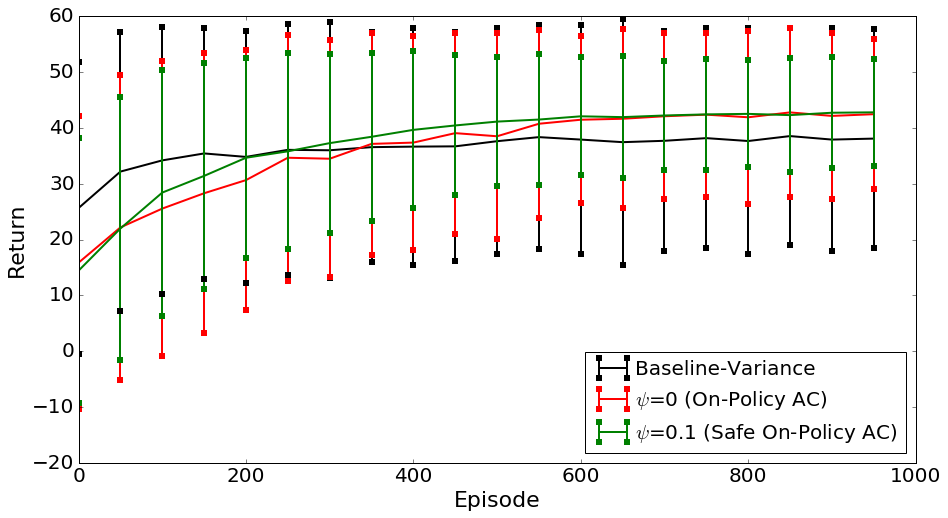

In [49]:
"""
Return Plot
"""
save_folder = os.path.join(major_dir,"ReturnDistPLotsOverall")
if not os.path.exists(save_folder):
        os.makedirs(save_folder)

start = 0.0
stop = 1.0
number_of_lines= len(file_names_to_read)
cm_subsection = np.linspace(start, stop, number_of_lines)
colors = [ cm.Dark2(x) for x in cm_subsection ]
colors=['k','r', 'g', 'c', 'm','y','orange']

labels_write=["Baseline-Variance","$\psi$=0 (On-Policy AC)","$\psi$=0.1 (Safe On-Policy AC)"]
color_count = 0

start_from= 0
end_to = 1000
k_steps = 1 #Adjust ksteps accordingly here
window = 50
fig, ax = plt.subplots(figsize=(15, 8))
color_count = 0
print("len(file_names_to_read)",len(file_names_to_read))
for k in [2,4,6]:#range(0, len(file_names_to_read)):
    reward = final_rewards[k][0][start_from:end_to]
    reward_std = final_rewards[k][1][start_from:end_to]
    mean_score = np.mean(reward[-100:])
    mean_var = np.mean(reward_std[-100:])
    length = int(reward.shape[0]/ window)
    new_reward = np.zeros(length)
    new_reward_std = np.zeros(length)
    x_axis = []
    for i in range(0,length):
        new_reward[i] = np.mean(reward[i*window : i*window + window])
        new_reward_std[i] = np.mean(reward_std[i*window : i*window + window])
        x_axis.append(start_from+i*k_steps*window)

    mean_std_dev = np.mean(new_reward_std)
    error =new_reward_std
    name = file_names_to_read[k]
    linestyle="-"
    
#     if mean_score <25.0:
#         continue
    print(file_names_to_read[k])
    print("Mean score: ", mean_score)
    print("Mean var: ", mean_var)
    print(k)
    
#     plt.plot(x_axis, new_reward, label = name, linewidth = 2, color = colors[color_count] )
    plt.errorbar(x_axis, new_reward, new_reward_std, label = labels_write[color_count],barsabove=True, linewidth = 2,capthick = 6, color = colors[color_count] )
    color_count +=1

plt.xlabel("Episode", fontsize=22)
plt.ylabel("Return",fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 20}, loc='best', handletextpad=0.1)

plt.savefig((os.path.join(save_folder,"OnPolicyComparisonNew"+".png")), dpi=200, facecolor='w', edgecolor='w',
           orientation='portrait', papertype=None, format=None,
           transparent=True, bbox_inches='tight', pad_inches=0,
           frameon=None)
plt.show()
plt.close()

In [3]:
layout = """\
wwwwwwwwwwwww
w     w     w
w   ffwff   w
w  fffffff  w
w   ffwff   w
w     w     w
ww wwww     w
w     www www
w     w     w
w     w     w
w           w
w     w     w
wwwwwwwwwwwww
"""

In [2]:
#Plot FR in Discrete World
import gym
from fourrooms import Fourrooms
import os
import matplotlib.pyplot as plt
import seaborn as sn

class Tabular:
    def __init__(self, nstates):
        self.nstates = nstates

    def __call__(self, state):
        return np.array([state, ])

    def __len__(self):
        return self.nstates
    
   
names =["Results_AC/FourRoomSACOnP_15-05/R50_E2000_Psi0.0_LRC0.05_LRTheta0.001_LRV0.02_temp0.05_seed10_Policy_S",
        "Results_AC/FourRoomSACOnP_15-05/R50_E2000_Psi0.1_LRC0.1_LRTheta0.001_LRV0.02_temp0.05_seed10_Policy_S",
       "Results_BaselineVarUpdated/FR_17-05/R50_E2000_Lam0.4_LRC0.1_LRTheta0.001_b5500.0_temp0.05_gam0.99_seed10"]

env = gym.make('Fourrooms-v0')
num_states = env.observation_space.n
features = Tabular(num_states)
nactions = env.action_space.n
weight_policy_total_list=[]
for index in range(len(names)):
    weight_policy_total_list.append(np.load(os.path.join(names[index],"Weights_Policy.npy")))


[2019-05-17 16:10:01,417] Making new env: Fourrooms-v0


In [4]:
def GetFrozenStates():
    num_elem = 13
    line_count = 0
    element_count = 0
    frozen_states =[]
    state_num=0
    for line in layout.splitlines():
        for i in range(num_elem):        
            if line[i] == "f":
                frozen_states.append(state_num)
            if line[i]!="w":
                state_num +=1
    return frozen_states

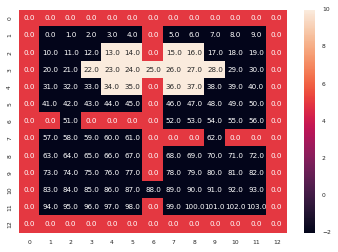

In [13]:
#Plot discrete Puddle

plt.figsize=(1,1)
mat_layout,ann_layout, mapping_state_row_col = getEnvLayout(layout, False)
sn.set(font_scale=0.6)
ax = sn.heatmap(mat_layout, annot = ann_layout, fmt = '')
plt.show()
plt.close()

In [8]:
#Plot the return distribution to show the variance

'''
Find trajectories with finalized learning
'''
dir_name = os.path.join("DistReturn")
if not os.path.exists(dir_name):
        os.makedirs(dir_name)
        
all_reward_distirbution_runs =[]
for run_to_show in range(50):        
    
    all_reward_distirbution =[]
    for t in range(len(names)):        
        weight_policy_total = weight_policy_total_list[t]        
#         run_to_show = 0
        episode =-1    
        num_trajectory = 10000
        count_trajectory = 1
        max_time_step = 100

        return_val=[]
        frozen_states = GetFrozenStates()

        while(count_trajectory <= num_trajectory):
            start = env.reset()
            states_visited=[]
            count_trajectory+=1
            curr_state = start
            curr_time = 0
            d= False
            gamma=0.99
            current_dicounting_factor=1
            discounted_reward = 0
            while(curr_state!= 62 and max_time_step > curr_time and d!=True):
                action = np.argmax(weight_policy_total[run_to_show,episode,curr_state, :])
                next_state,r,d,_ = env.step(action)
                if curr_state in frozen_states:
                    r = np.random.normal(0,8.0)
                discounted_reward += current_dicounting_factor*r
                curr_state = next_state
                current_dicounting_factor*=gamma
            return_val.append(discounted_reward)
        all_reward_distirbution.append(return_val)
    all_reward_distirbution_runs.append(all_reward_distirbution)
    print(run_to_show)
# run=34
# plt.figure(figsize = (10,10))
# bins = np.linspace(-20, 110, 90)
# plt.hist(all_reward_distirbution_runs[run], bins=20,range=(70,100), alpha=0.8,linewidth=0.2, label =['Baseline On-Policy AC','Safe On-Policy AC','Baseline-IndirectVar'])
# plt.xlabel("Return",fontsize=18)    
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.legend(fontsize=15, loc='best')
# # plt.savefig((os.path.join(dir_name, "Final_Partial2_dist_run"+str(run_to_show)+".png")), dpi=200, facecolor='w', 
# #     edgecolor='w', orientation='portrait', papertype=None, format=None,
# #     transparent=True, bbox_inches='tight', pad_inches=0, frameon=None)
# plt.show()
# plt.close()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


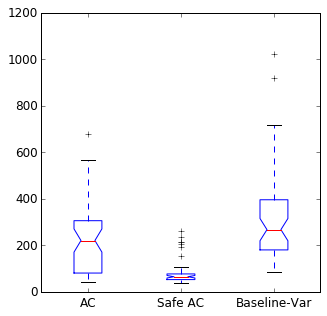

In [19]:
#Ploting
# r1- var
# r2- var
# ...

# rn- var

# Compute mean of variance and variance of variance

#Plot the return distribution to show the variance

'''
Find trajectories with finalized learning
'''
dir_name = os.path.join("DistVariance")
if not os.path.exists(dir_name):
        os.makedirs(dir_name)
runs=50
variance_arr= np.zeros((runs,3))
for i in range(runs):    
    for index in range(len(names)):
        variance_arr[i,index] = np.var(all_reward_distirbution_runs[i][index],ddof=1)
        
plt.figure(figsize = (5,5))
plt.boxplot(variance_arr, notch=True, labels=['AC','Safe AC','Baseline-Var'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig((os.path.join(dir_name, "Variance.png")), dpi=200, facecolor='w', 
    edgecolor='w', orientation='portrait', papertype=None, format=None,
    transparent=True, bbox_inches='tight', pad_inches=0, frameon=None)
plt.show()
plt.close()


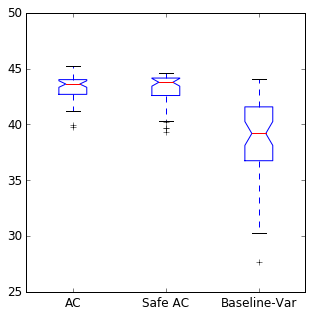

In [22]:
#Ploting mean plot
# r1- mean
# r2- mean
# ...

# rn- mean

# Compute mean of mean; variance of mean

#Plot the return distribution to show the mean

'''
Find trajectories with finalized learning
'''
dir_name = os.path.join("DistMean")
if not os.path.exists(dir_name):
        os.makedirs(dir_name)
runs=50
mean_arr= np.zeros((runs,3))
for i in range(runs):    
    for index in range(len(names)):
        mean_arr[i,index] = np.mean(all_reward_distirbution_runs[i][index])

        
plt.figure(figsize = (5,5))
plt.boxplot(mean_arr, notch=True, labels=['AC','Safe AC','Baseline-Var'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig((os.path.join(dir_name, "Mean.png")), dpi=200, facecolor='w', 
    edgecolor='w', orientation='portrait', papertype=None, format=None,
    transparent=True, bbox_inches='tight', pad_inches=0, frameon=None)
plt.show()
plt.close()


In [30]:
#finding the best run wich had highest mean and lowest variance
type_names= ['AC','Safe AC','Baseline-Var']
dir_name = os.path.join("OverallRunsPerf")
if not os.path.exists(dir_name):
        os.makedirs(dir_name)

x= np.arange(0,50)
for index in range(len(type_names)):
    arg = np.argmax(mean_arr[:,index])
    arg_var = np.argmin(variance_arr[:,index])
    print("name: ", type_names[index], " arg: ", arg, " mean: ", mean_arr[arg, index])
    print("Varinace- Arg:",arg_var, " var: ", variance_arr[arg_var, index], "mean of this: ", mean_arr[arg_var,index])
    print("-------------------")
#     plt.plot(x, mean_arr[:,index], label="mean")
#     plt.plot(x, variance_arr[:,index], label="var")
#     plt.title(type_names[index])
#     plt.legend(fontsize=15, loc='best')
#     plt.savefig((os.path.join(dir_name, "Perf.png")), dpi=200, facecolor='w', 
#     edgecolor='w', orientation='portrait', papertype=None, format=None,
#     transparent=True, bbox_inches='tight', pad_inches=0, frameon=None)
#     plt.show()
#     plt.close()

name:  AC  arg:  4  mean:  45.266544141786625
Varinace- Arg: 13  var:  43.986687464117146 mean of this:  44.59862106271958
-------------------
name:  Safe AC  arg:  16  mean:  44.62511702228558
Varinace- Arg: 10  var:  36.79118434445494 mean of this:  44.22130210711069
-------------------
name:  Baseline-Var  arg:  0  mean:  44.05326128051267
Varinace- Arg: 4  var:  86.75253704799684 mean of this:  42.87717784804035
-------------------


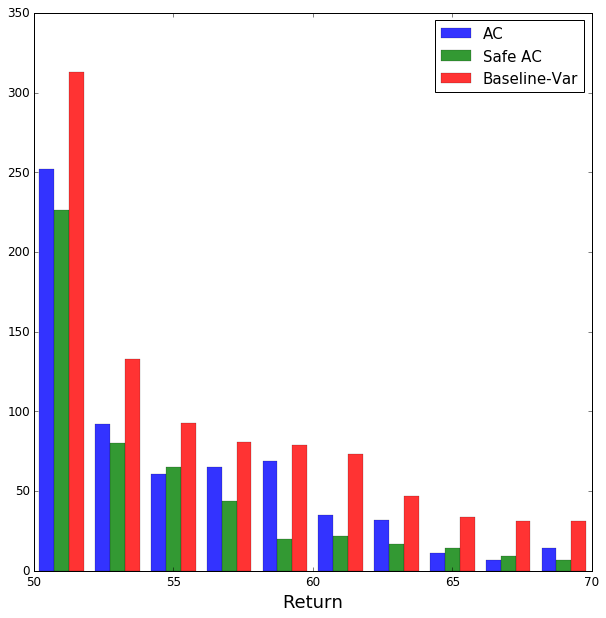

In [45]:
#plot return distribution now
runs= [13,10,4]
type_names= ['AC','Safe AC','Baseline-Var']
plt.figure(figsize = (10, 10))
return_distribution =[]
for i in range(len(runs)):
    return_distribution.append(all_reward_distirbution_runs[runs[i]][i])

bins = np.linspace(-10, 110, 90)
plt.hist(return_distribution, bins=10, range=(50,70), alpha=0.8,linewidth=0.2, label =type_names)
# plt.hist(return_distribution, bins, alpha=0.8,linewidth=0.2, label =type_names)
plt.xlabel("Return",fontsize=18)    
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=15, loc='best')
plt.savefig((os.path.join(dir_name, "ZoomedRightReturnDist.png")), dpi=200, facecolor='w', 
edgecolor='w', orientation='portrait', papertype=None, format=None,
transparent=True, bbox_inches='tight', pad_inches=0, frameon=None)
plt.show()
plt.close()
